##### Model Training

Import Data and Required Packages

In [ ]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Modelling imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
# define evaluate models function
# calculates mean absolute error, mean squared error, root mean squared error
# and r2 score
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    # Linear regression with L1 regularization
    "Lasso": Lasso(),
    # Linear regression with L2 regularization
    "Ridge": Ridge(),

    "K-Neighbors Regressor": KNeighborsRegressor(),

    "Decision Tree": DecisionTreeRegressor(),

    "Random Forest Regressor": RandomForestRegressor(),
    # extreme gradient boosting
    "XGBRegressor": XGBRegressor(), 
    #
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),

    "AdaBoost Regressor": AdaBoostRegressor()
}
# define empty list
model_list = []
r2_list =[]

# for every model in the list
for i in range(len(list(models))):
    # set model to model at index i
    model = list(models.values())[i]

    # Train model
    model.fit(X_train, y_train) 

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    # y_train is actual value, y_train_pred is predicted values from X_train
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    # y_test is actual value, y_test_pred is predicted value from X_test
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])

    # append each model to model_list
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

In [ ]:

# sort values by greatest R2_score
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [2]:
final_df=pd.read_csv('after_scaling.csv')
final_df.head()

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
0,0.25,1.000000,0.000000,0.0,0.521739,0.909091,0.000000,0.0,0.826087,0.272727,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.25,0.978764,0.000000,0.0,0.608696,0.090909,0.000000,0.0,0.826087,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.25,0.978764,0.000000,0.0,0.608696,0.090909,0.000000,0.0,0.913043,0.363636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.25,0.948955,0.000000,0.0,0.782609,0.727273,0.035714,0.0,0.000000,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.50,0.932574,0.307692,0.0,0.652174,0.090909,0.321429,0.0,0.043478,0.636364,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10451 entries, 0 to 10450
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10451 non-null  float64
 1   Price                              10451 non-null  float64
 2   dept_day                           10451 non-null  float64
 3   dept_month                         10451 non-null  float64
 4   dept_hour                          10451 non-null  float64
 5   dept_minute                        10451 non-null  float64
 6   arrival_day                        10451 non-null  float64
 7   arrival_month                      10451 non-null  float64
 8   arrival_hour                       10451 non-null  float64
 9   arrival_minute                     10451 non-null  float64
 10  duration_hours                     10451 non-null  float64
 11  duration_minutes                   10451 non-null  flo

In [4]:
final_df.describe()

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
count,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,...,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000,10451.000000
mean,0.200531,0.205170,0.479615,0.567761,0.542432,0.443550,0.459614,0.567761,0.582228,0.449413,...,0.000287,0.036456,0.415558,0.273658,0.066692,0.415558,0.121041,0.066692,0.036456,0.086595
std,0.165159,0.124861,0.325583,0.387701,0.248919,0.342076,0.302466,0.387701,0.298066,0.301216,...,0.016941,0.187430,0.492842,0.445857,0.249500,0.492842,0.326191,0.249500,0.187430,0.281253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.098370,0.192308,0.000000,0.347826,0.090909,0.214286,0.000000,0.347826,0.181818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.184732,0.423077,0.666667,0.478261,0.454545,0.428571,0.666667,0.608696,0.454545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.300023,0.769231,1.000000,0.782609,0.727273,0.714286,1.000000,0.826087,0.636364,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
final_df.dtypes

Total_Stops                          float64
Price                                float64
dept_day                             float64
dept_month                           float64
dept_hour                            float64
dept_minute                          float64
arrival_day                          float64
arrival_month                        float64
arrival_hour                         float64
arrival_minute                       float64
duration_hours                       float64
duration_minutes                     float64
Route1                               float64
Route2                               float64
Route3                               float64
Route4                               float64
Route5                               float64
Air India                            float64
GoAir                                float64
IndiGo                               float64
Jet Airways                          float64
Jet Airways Business                 float64
Multiple c

In [6]:
# Extract Dependent and Independent vars
X=final_df.drop('Price',axis=1)
y=final_df['Price']

In [7]:
X.head()
X.shape

(10451, 36)

In [8]:
y.head()
y.shape

(10451,)

In [9]:
# spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape

((8360, 36), (2091, 36))

In [10]:
# Examine features with low variance with VarianceThreshold (thus appear constant)
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0.001) # conservative threshold
var_thres.fit(X_train)

constant_columns = [column for column in X_train.columns 
                    if column not in X_train.columns[var_thres.get_support()]]
constant_columns

['Jet Airways Business', 'Trujet', 'Vistara Premium economy']

In [11]:
# drop the columns
X_train.drop(constant_columns,axis=1, inplace=True)

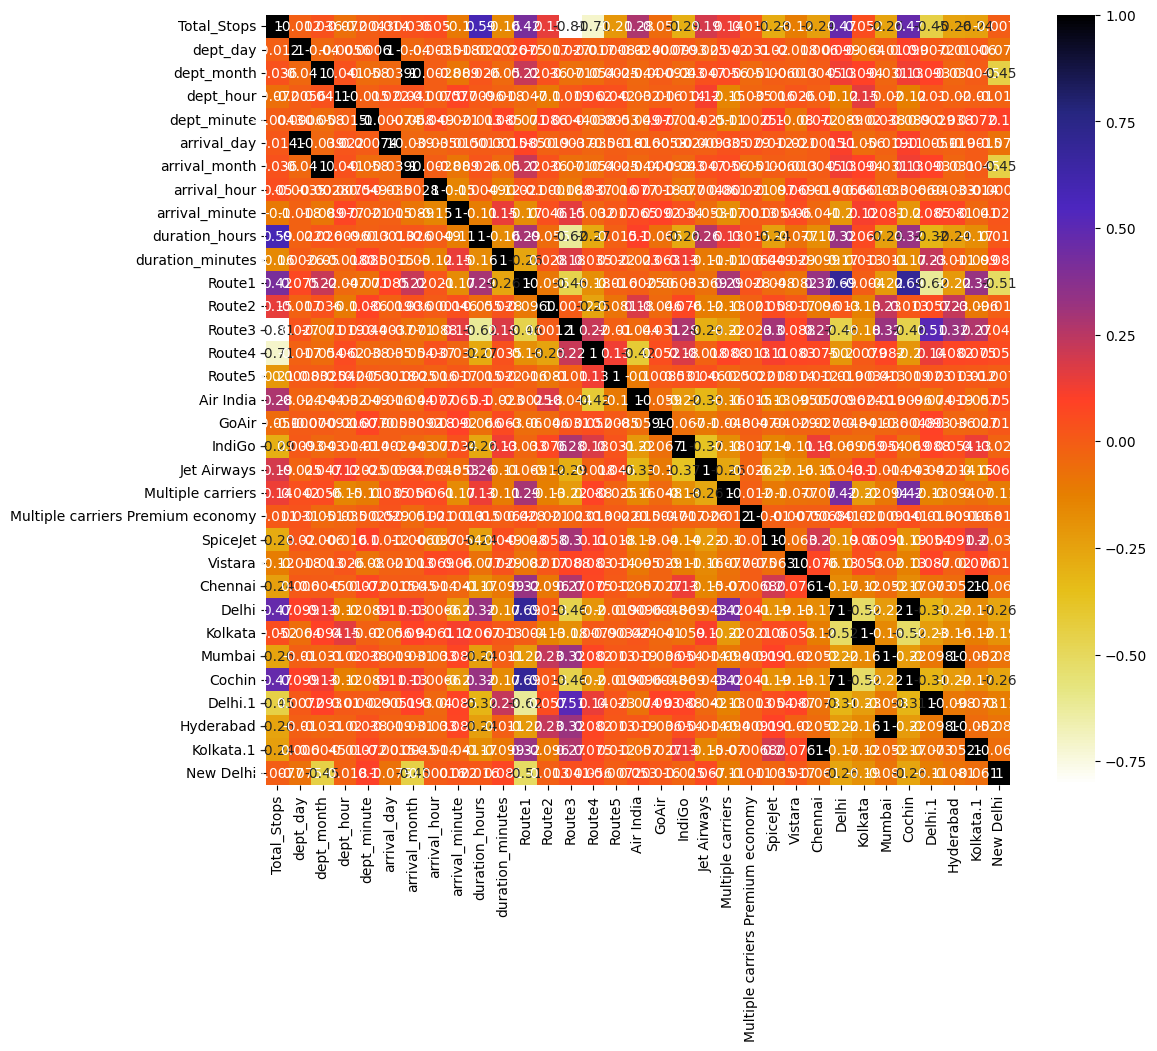

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [13]:
X_train.corr()

,Total_Stops,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
Total_Stops,1.000000,-0.012020,0.036429,-0.071659,-0.004282,0.014179,0.036429,0.049527,-0.101139,0.589906,...,-0.118023,-0.237182,0.473190,0.052412,-0.255341,0.473190,-0.448548,-0.255341,-0.237182,-0.007710
dept_day,-0.012020,1.000000,-0.040363,-0.005562,0.000597,0.998297,-0.040363,-0.003545,-0.017732,-0.021668,...,-0.018003,0.006013,0.098968,-0.064060,-0.010450,0.098968,0.007198,-0.010450,0.006013,-0.074878
dept_month,0.036429,-0.040363,1.000000,0.040685,-0.057684,-0.038953,1.000000,-0.002843,-0.088997,0.025635,...,-0.012633,0.004516,0.125974,0.093513,-0.031140,0.125974,0.093121,-0.031140,0.004516,-0.452369
dept_hour,-0.071659,-0.005562,0.040685,1.000000,-0.014511,0.022482,0.040685,-0.007451,0.076780,0.009639,...,0.025866,-0.010336,-0.122926,0.154879,-0.020270,-0.122926,0.010314,-0.020270,-0.010336,-0.017628
dept_minute,-0.004282,0.000597,-0.057684,-0.014511,1.000000,-0.000742,-0.057684,0.048650,-0.021314,-0.012632,...,-0.079590,0.072227,-0.089306,-0.019634,0.037701,-0.089306,0.002943,0.037701,0.072227,0.102395
arrival_day,0.014179,0.998297,-0.038953,0.022482,-0.000742,1.000000,-0.038953,-0.034643,-0.014582,0.001283,...,-0.020616,-0.001468,0.107158,-0.056204,-0.019336,0.107158,-0.005112,-0.019336,-0.001468,-0.074571
arrival_month,0.036429,-0.040363,1.000000,0.040685,-0.057684,-0.038953,1.000000,-0.002843,-0.088997,0.025635,...,-0.012633,0.004516,0.125974,0.093513,-0.031140,0.125974,0.093121,-0.031140,0.004516,-0.452369
arrival_hour,0.049527,-0.003545,-0.002843,-0.007451,0.048650,-0.034643,-0.002843,1.000000,-0.145247,-0.004893,...,0.069491,-0.014091,-0.006595,0.060922,-0.033203,-0.006595,-0.039913,-0.033203,-0.014091,-0.000164
arrival_minute,-0.101139,-0.017732,-0.088997,0.076780,-0.021314,-0.014582,-0.088997,-0.145247,1.000000,-0.114914,...,0.059859,-0.041230,-0.200343,0.117790,0.081374,-0.200343,0.084870,0.081374,-0.041230,0.021869
duration_hours,0.589906,-0.021668,0.025635,0.009639,-0.012632,0.001283,0.025635,-0.004893,-0.114914,1.000000,...,-0.076977,-0.174042,0.324838,0.066671,-0.236117,0.324838,-0.316121,-0.236117,-0.174042,0.016399


In [14]:
# With the following function we can select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in the absolute coefficient value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.99)
len(set(corr_features))

5

In [16]:
# print the correlated features
corr_features

{'Cochin', 'Hyderabad', 'Kolkata.1', 'arrival_day', 'arrival_month'}

In [17]:
X_train.columns

Index(['Total_Stops', 'dept_day', 'dept_month', 'dept_hour', 'dept_minute',
       'arrival_day', 'arrival_month', 'arrival_hour', 'arrival_minute',
       'duration_hours', 'duration_minutes', 'Route1', 'Route2', 'Route3',
       'Route4', 'Route5', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi.1',
       'Hyderabad', 'Kolkata.1', 'New Delhi'],
      dtype='object')

In [ ]:
# Examine which of the correlated features most correlated with Price
corr_df = final_df[list(corr_features) + ['Price']]

# Get the correlations of all columns with the dependent variable
correlations_with_dependent = corr_df.corr()['Price']

# Sort the correlations in descending order to see the most correlated columns
# Exclude the dependent variable itself from the list as it will have a perfect correlation of 1
correlations_with_dependent.drop('Price').abs().sort_values(ascending=False)

Cochin           0.279508
Hyderabad        0.238644
Kolkata.1        0.185583
arrival_day      0.137313
arrival_month    0.105821
Name: Price, dtype: float64

In [19]:
# Drop the correlated columns except Cochin
X_train.drop(['Hyderabad', 'Kolkata.1', 'arrival_day', 'arrival_month',],axis=1, inplace=True)

In [20]:
# Mutual information gain, examine the mutual information between each feature and Price
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.74435773, 0.32583356, 0.60399313, 0.85179891, 0.7034939 ,
       1.08422471, 0.86521836, 0.90470239, 0.64870133, 1.03313389,
       1.68001373, 1.17773469, 0.29308746, 0.01511853, 0.27566335,
       0.04364178, 0.35701502, 0.52855036, 0.2462136 , 0.00515033,
       0.20718085, 0.1314923 , 0.1304074 , 0.50816145, 0.44313664,
       0.20515629, 0.50076101, 0.33065934, 0.15588347])

In [21]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
# sort by greatest to least
mutual_info.sort_values(ascending=False)

Route2                               1.680014
Route3                               1.177735
arrival_hour                         1.084225
Route1                               1.033134
duration_hours                       0.904702
arrival_minute                       0.865218
dept_hour                            0.851799
Total_Stops                          0.744358
dept_minute                          0.703494
duration_minutes                     0.648701
dept_month                           0.603993
Jet Airways                          0.528550
Delhi                                0.508161
Cochin                               0.500761
Kolkata                              0.443137
IndiGo                               0.357015
Delhi.1                              0.330659
dept_day                             0.325834
Route4                               0.293087
Air India                            0.275663
Multiple carriers                    0.246214
SpiceJet                          

In [22]:
# Use mutual information threshold of 0.01, drop 'multiple carriers' column
X_train.drop(['Multiple carriers Premium economy'],axis=1, inplace=True)

In [23]:
# Get the columns present in X_test but not in X_train
columns_to_drop_from_X_test = X_test.columns.difference(X_train.columns)

# Drop these columns from X_test
X_test.drop(columns=columns_to_drop_from_X_test,axis=1, inplace=True)

In [24]:
X_train.columns

Index(['Total_Stops', 'dept_day', 'dept_month', 'dept_hour', 'dept_minute',
       'arrival_hour', 'arrival_minute', 'duration_hours', 'duration_minutes',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Multiple carriers', 'SpiceJet', 'Vistara',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi.1',
       'New Delhi'],
      dtype='object')

In [26]:
X_test.columns

Index(['Total_Stops', 'dept_day', 'dept_month', 'dept_hour', 'dept_minute',
       'arrival_hour', 'arrival_minute', 'duration_hours', 'duration_minutes',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Multiple carriers', 'SpiceJet', 'Vistara',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi.1',
       'New Delhi'],
      dtype='object')

In [27]:
# Modelling imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [28]:
# define evaluate models function
# calculates mean absolute error, mean squared error, root mean squared error
# and r2 score
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
# Dictionary of all models to see which one has best performance
models = {
    "Linear Regression": LinearRegression(),
    # Linear regression with L1 regularization
    "Lasso": Lasso(),
    # Linear regression with L2 regularization
    "Ridge": Ridge(),

    "K-Neighbors Regressor": KNeighborsRegressor(),

    "Decision Tree": DecisionTreeRegressor(),

    "Random Forest Regressor": RandomForestRegressor(),
    # extreme gradient boosting
    "XGBRegressor": XGBRegressor(), 
    #
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),

    "AdaBoost Regressor": AdaBoostRegressor()
}
# define empty list
model_list = []
r2_list =[]

# for every model in the list
for i in range(len(list(models))):
    # set model to model at index i
    model = list(models.values())[i]

    # Train model
    model.fit(X_train, y_train) 

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    # y_train is actual value, y_train_pred is predicted values from X_train
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    # y_test is actual value, y_test_pred is predicted value from X_test
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])

    # append each model to model_list
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0771
- Mean Absolute Error: 0.0549
- R2 Score: 0.6147
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0772
- Mean Absolute Error: 0.0543
- R2 Score: 0.6317


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1243
- Mean Absolute Error: 0.1023
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1272
- Mean Absolute Error: 0.1038
- R2 Score: -0.0001


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0771
- Mean Absolute Error: 0.0549
- R2 Score: 0.6148
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0772
- Mean Absolute Error: 0.0542
- R2 Score: 0.6316


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0490
- Mean Absolute Error: 0.0313
- R2 Score: 0.8445
----------------------

In [30]:
# sort values by greatest R2_score
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.874322
6,XGBRegressor,0.868313
5,Random Forest Regressor,0.835868
3,K-Neighbors Regressor,0.767690
4,Decision Tree,0.709069
0,Linear Regression,0.631737
2,Ridge,0.631643
8,AdaBoost Regressor,0.625953
1,Lasso,-0.000139


In [31]:
# You can see Category Boosting regressor has best performance, follow by XGBRegressor and Randomforest
# Interpretation:
# Catboost, XGBoost offer better performance than Adaboost since they include regularization, while Adaboost is prone to overfitting
# These models use gradient boosting and decision trees. 
# random forest also is more robust and reduce overfitting as compared to decision trees, and are better able to handle more features

# decision tree overall can model complex, non-linear relationships, handle a mix of categorical and numerical data without extensive preprocessing, and are more robust to outliers and missing values


In [ ]:
# Let's see if we can find a better parameter for random froest 
# use random search cross validation 
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['sqrt', 'log2', None], # Max features controls maximum number of features considered
    # when looking for best split at each node
    # sqrt sets max features to sqrt of total number of features
    # log2 sets max features to the base 2 logarithm of total num of features
    # None considers all features at each split. 
    'max_depth':[5,10,15,20],
    }

rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 120, 'max_features': None, 'max_depth': 10}

In [ ]:
# It appears the best random forest parameters are with 120 estimators, max depth of 10, and consider all features

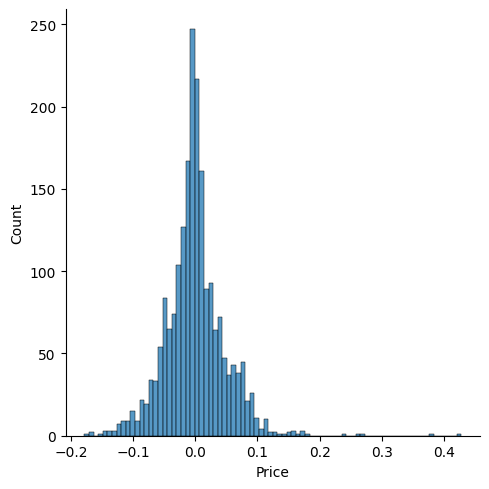

In [34]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [35]:
r2_score(y_test,prediction)

0.8580142819949442